In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_hdf("vict05to19.h5")

In [3]:
print(df.columns.values)

['DT_DAY' 'DT_HOUR' 'CD_DAY_OF_WEEK' 'TX_DAY_OF_WEEK_DESCR_FR'
 'TX_DAY_OF_WEEK_DESCR_NL' 'MS_VICT' 'MS_SLY_INJ' 'MS_SERLY_INJ'
 'MS_DEAD_30_DAYS' 'CD_BUILD_UP_AREA' 'TX_BUILD_UP_AREA_DESCR_NL'
 'TX_BUILD_UP_AREA_DESCR_FR' 'CD_VICT_TYPE' 'TX_VICT_TYPE_DESCR_FR'
 'TX_VICT_TYPE_DESCR_NL' 'CD_ROAD_USER_TYPE' 'TX_ROAD_USR_TYPE_DESCR_FR'
 'TX_ROAD_USR_TYPE_DESCR_NL' 'CD_ROAD_TYPE' 'TX_ROAD_TYPE_DESCR_FR'
 'TX_ROAD_TYPE_DESCR_NL' 'CD_LIGHT_COND' 'TX_LIGHT_COND_DESCR_FR'
 'TX_LIGHT_COND_DESCR_NL' 'CD_AGE_CLS' 'TX_AGE_CLS_DESCR_FR'
 'TX_AGE_CLS_DESCR_NL' 'CD_MUNTY_REFNIS' 'TX_MUNTY_DESCR_FR'
 'TX_MUNTY_DESCR_NL' 'CD_DSTR_REFNIS' 'TX_ADM_DSTR_DESCR_FR'
 'TX_ADM_DSTR_DESCR_NL' 'CD_PROV_REFNIS' 'TX_PROV_DESCR_FR'
 'TX_PROV_DESCR_NL' 'CD_RGN_REFNIS' 'TX_RGN_DESCR_FR' 'TX_RGN_DESCR_NL'
 'CD_SEX' 'TX_SEX_DESCR_FR' 'TX_SEX_DESCR_NL']


In [4]:
data = df[['DT_DAY',
           'TX_DAY_OF_WEEK_DESCR_NL',
           'MS_VICT',
           'MS_SLY_INJ',
           'MS_SERLY_INJ',
           'MS_DEAD_30_DAYS',
           'TX_VICT_TYPE_DESCR_NL',
           'TX_ROAD_USR_TYPE_DESCR_NL',
          'TX_ROAD_TYPE_DESCR_NL',
          'TX_AGE_CLS_DESCR_NL',
          'TX_PROV_DESCR_NL',
          'TX_RGN_DESCR_NL'
          ]]
data

,DT_DAY,TX_DAY_OF_WEEK_DESCR_NL,MS_VICT,MS_SLY_INJ,MS_SERLY_INJ,MS_DEAD_30_DAYS,TX_VICT_TYPE_DESCR_NL,TX_ROAD_USR_TYPE_DESCR_NL,TX_ROAD_TYPE_DESCR_NL,TX_AGE_CLS_DESCR_NL,TX_PROV_DESCR_NL,TX_RGN_DESCR_NL
0,2005-11-25,vrijdag,1,1,0,0,Fietser,Fiets,Gemeenteweg,50 tot 54 jaar,Provincie Antwerpen,Vlaams Gewest
1,2005-10-19,woensdag,1,1,0,0,Bestuurder,Personenauto,Gemeenteweg,45 tot 49 jaar,Provincie Antwerpen,Vlaams Gewest
2,2005-10-22,zaterdag,1,0,1,0,Bestuurder,Personenauto,Autosnelweg,60 tot 64 jaar,Provincie Antwerpen,Vlaams Gewest
3,2005-10-18,dinsdag,1,1,0,0,Bromfietser,Bromfiets B (tweewielige),Gewestweg,15 tot 19 jaar,Provincie Antwerpen,Vlaams Gewest
4,2005-10-10,maandag,1,1,0,0,Bestuurder,Personenauto,Gemeenteweg,25 tot 29 jaar,Provincie Antwerpen,Vlaams Gewest
...,...,...,...,...,...,...,...,...,...,...,...,...
843615,2019-06-15,zaterdag,1,0,1,0,Passagier,Personenauto,Gewestweg,5 tot 9 jaar,Provincie Namen,Waals Gewest
843616,2019-06-15,zaterdag,1,0,0,1,Bestuurder,Personenauto,Gewestweg,60 tot 64 jaar,Provincie Namen,Waals Gewest
843617,2019-06-15,zaterdag,1,1,0,0,Motorfietser,Motorfiets meer dan 400 cc,Gewestweg,50 tot 54 jaar,Provincie Namen,Waals Gewest
843618,2019-06-09,zondag,1,1,0,0,Passagier,Personenauto,Gewestweg,20 tot 24 jaar,Provincie Namen,Waals Gewest


In [5]:
data = data.rename({"DT_DAY":"Year", 
                    "TX_DAY_OF_WEEK_DESCR_NL":"Day of week",
                    "MS_VICT":"Number of victims",
                    "MS_SLY_INJ":"Slightly injured",
                    "MS_SERLY_INJ":"Seriously injured",
                    "MS_DEAD_30_DAYS":"Dead within 30 days",
                    "TX_VICT_TYPE_DESCR_NL":"Victim type",
                    "TX_ROAD_USR_TYPE_DESCR_NL":"Vehicle",
                    "TX_ROAD_TYPE_DESCR_NL":"Road type",
                    "TX_AGE_CLS_DESCR_NL":"Age",
                    "TX_PROV_DESCR_NL":"Province",
                    "TX_RGN_DESCR_NL":"Region"},
                   axis=1)
data.head()

,Year,Day of week,Number of victims,Slightly injured,Seriously injured,Dead within 30 days,Victim type,Vehicle,Road type,Age,Province,Region
0,2005-11-25,vrijdag,1,1,0,0,Fietser,Fiets,Gemeenteweg,50 tot 54 jaar,Provincie Antwerpen,Vlaams Gewest
1,2005-10-19,woensdag,1,1,0,0,Bestuurder,Personenauto,Gemeenteweg,45 tot 49 jaar,Provincie Antwerpen,Vlaams Gewest
2,2005-10-22,zaterdag,1,0,1,0,Bestuurder,Personenauto,Autosnelweg,60 tot 64 jaar,Provincie Antwerpen,Vlaams Gewest
3,2005-10-18,dinsdag,1,1,0,0,Bromfietser,Bromfiets B (tweewielige),Gewestweg,15 tot 19 jaar,Provincie Antwerpen,Vlaams Gewest
4,2005-10-10,maandag,1,1,0,0,Bestuurder,Personenauto,Gemeenteweg,25 tot 29 jaar,Provincie Antwerpen,Vlaams Gewest


In [6]:
data2 = data.loc[data["Vehicle"].isin(["Fiets",
                                       "Elektrische fiets",
                                       "Fiets met elektrische hulpmotor (<=250W en <=25km/u)",
                                      "Speed pedelec (<= 4000W en <=45km/u)",
                                      "Gemotoriseerde fiets (<=1000W en <=25km/u)"])]
data2.head()

,Year,Day of week,Number of victims,Slightly injured,Seriously injured,Dead within 30 days,Victim type,Vehicle,Road type,Age,Province,Region
0,2005-11-25,vrijdag,1,1,0,0,Fietser,Fiets,Gemeenteweg,50 tot 54 jaar,Provincie Antwerpen,Vlaams Gewest
16,2005-12-12,maandag,1,1,0,0,Fietser,Fiets,Gemeenteweg,35 tot 39 jaar,Provincie Antwerpen,Vlaams Gewest
17,2005-10-11,dinsdag,1,1,0,0,Fietser,Fiets,Gewestweg,45 tot 49 jaar,Provincie Antwerpen,Vlaams Gewest
22,2005-09-26,maandag,1,1,0,0,Fietser,Fiets,Gemeenteweg,75 jaar en meer,Provincie Antwerpen,Vlaams Gewest
25,2005-11-25,vrijdag,1,1,0,0,Fietser,Fiets,Autosnelweg,35 tot 39 jaar,Provincie Antwerpen,Vlaams Gewest


In [7]:
datayeartype = data2.groupby(by=[data2["Year"].dt.strftime("%Y"), "Vehicle"]).sum()

In [8]:
datayeartype

,,Number of victims,Slightly injured,Seriously injured,Dead within 30 days
Year,Vehicle,,,,
2005,Fiets,8278,7331,871,76
2006,Fiets,8577,7624,859,94
2007,Fiets,9011,8008,910,93
2008,Fiets,9092,8137,860,95
2009,Fiets,9002,8028,882,92
2010,Fiets,8741,7819,849,73
2011,Fiets,9876,8806,996,74
2012,Fiets,9152,8146,922,84
2013,Fiets,9038,7980,975,83


In [9]:
datayeartype2 = datayeartype.reset_index()

In [10]:
datayearbike = data2.groupby(by=[data2["Year"].dt.strftime("%Y")]).sum()

In [11]:
datayearbike

,Number of victims,Slightly injured,Seriously injured,Dead within 30 days
Year,,,,
2005,8278,7331,871,76
2006,8577,7624,859,94
2007,9011,8008,910,93
2008,9092,8137,860,95
2009,9002,8028,882,92
2010,8741,7819,849,73
2011,9876,8806,996,74
2012,9152,8146,922,84
2013,9038,7980,975,83


In [12]:
datayearbike.reset_index()

,Year,Number of victims,Slightly injured,Seriously injured,Dead within 30 days
0,2005,8278,7331,871,76
1,2006,8577,7624,859,94
2,2007,9011,8008,910,93
3,2008,9092,8137,860,95
4,2009,9002,8028,882,92
5,2010,8741,7819,849,73
6,2011,9876,8806,996,74
7,2012,9152,8146,922,84
8,2013,9038,7980,975,83
9,2014,9948,8824,1042,82


In [13]:
datayearbike = datayearbike.drop(columns=["Number of victims"])
datayearbike

,Slightly injured,Seriously injured,Dead within 30 days
Year,,,
2005,7331,871,76
2006,7624,859,94
2007,8008,910,93
2008,8137,860,95
2009,8028,882,92
2010,7819,849,73
2011,8806,996,74
2012,8146,922,84
2013,7980,975,83


In [14]:
datayearbike_10to19 = datayearbike.reset_index()
datayearbike_10to19 = datayearbike_10to19.drop([0, 1, 2, 3, 4])

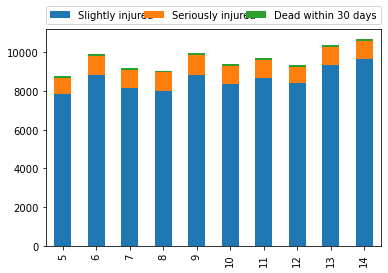

<Figure size 2160x2160 with 0 Axes>

In [15]:
datayearbike_10to19.plot(kind="bar", stacked=True, legend=True)
plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=3)
plt.figure(figsize=(30,30))
plt.show()

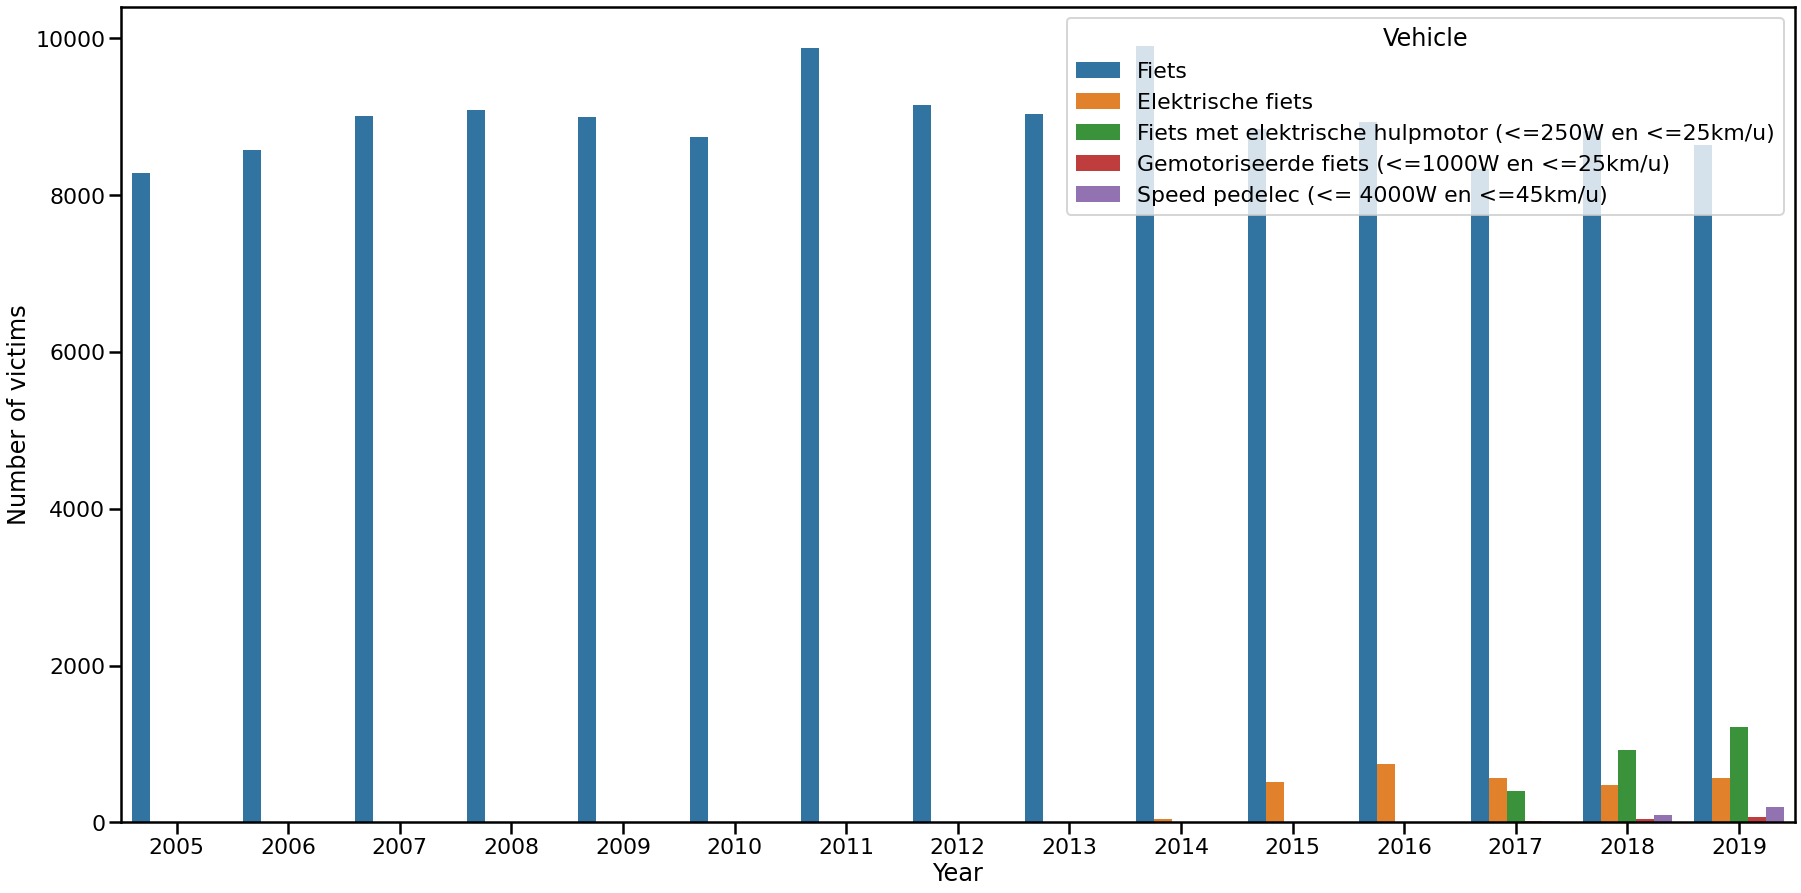

In [16]:
plt.figure(figsize=(30,15))
sns.set_context("poster")
sns.barplot(x="Year", y="Number of victims", hue="Vehicle",  data=datayeartype2)
plt.show()

In [17]:
datayeartype2["Mortality (%)"] = datayeartype2[["Dead within 30 days"]].div(datayeartype2["Number of victims"].values, axis=0)
datayeartype2

,Year,Vehicle,Number of victims,Slightly injured,Seriously injured,Dead within 30 days,Mortality (%)
0,2005,Fiets,8278,7331,871,76,0.009181
1,2006,Fiets,8577,7624,859,94,0.010960
2,2007,Fiets,9011,8008,910,93,0.010321
3,2008,Fiets,9092,8137,860,95,0.010449
4,2009,Fiets,9002,8028,882,92,0.010220
5,2010,Fiets,8741,7819,849,73,0.008351
6,2011,Fiets,9876,8806,996,74,0.007493
7,2012,Fiets,9152,8146,922,84,0.009178
8,2013,Fiets,9038,7980,975,83,0.009183
9,2014,Elektrische fiets,41,37,4,0,0.000000


In [18]:
datayeartype2["Mortality (%)"] = datayeartype2["Mortality (%)"].multiply(100)
datayeartype2

,Year,Vehicle,Number of victims,Slightly injured,Seriously injured,Dead within 30 days,Mortality (%)
0,2005,Fiets,8278,7331,871,76,0.918096
1,2006,Fiets,8577,7624,859,94,1.095954
2,2007,Fiets,9011,8008,910,93,1.032072
3,2008,Fiets,9092,8137,860,95,1.044875
4,2009,Fiets,9002,8028,882,92,1.021995
5,2010,Fiets,8741,7819,849,73,0.835145
6,2011,Fiets,9876,8806,996,74,0.749291
7,2012,Fiets,9152,8146,922,84,0.917832
8,2013,Fiets,9038,7980,975,83,0.918345
9,2014,Elektrische fiets,41,37,4,0,0.000000


In [19]:
datayeartype2["Vehicle"] = datayeartype2["Vehicle"].replace("Fiets", "Bicycle")
datayeartype2["Vehicle"] = datayeartype2["Vehicle"].replace("Elektrische fiets", "Electric bicycle")
datayeartype2["Vehicle"] = datayeartype2["Vehicle"].replace("Fiets met elektrische hulpmotor (<=250W en <=25km/u)", "Electric bicycle (<=250W and <=25km/h)")
datayeartype2["Vehicle"] = datayeartype2["Vehicle"].replace("Gemotoriseerde fiets (<=1000W en <=25km/u)", "Electric bicycle (<=1000W and <=25km/h)")
datayeartype2

,Year,Vehicle,Number of victims,Slightly injured,Seriously injured,Dead within 30 days,Mortality (%)
0,2005,Bicycle,8278,7331,871,76,0.918096
1,2006,Bicycle,8577,7624,859,94,1.095954
2,2007,Bicycle,9011,8008,910,93,1.032072
3,2008,Bicycle,9092,8137,860,95,1.044875
4,2009,Bicycle,9002,8028,882,92,1.021995
5,2010,Bicycle,8741,7819,849,73,0.835145
6,2011,Bicycle,9876,8806,996,74,0.749291
7,2012,Bicycle,9152,8146,922,84,0.917832
8,2013,Bicycle,9038,7980,975,83,0.918345
9,2014,Electric bicycle,41,37,4,0,0.000000


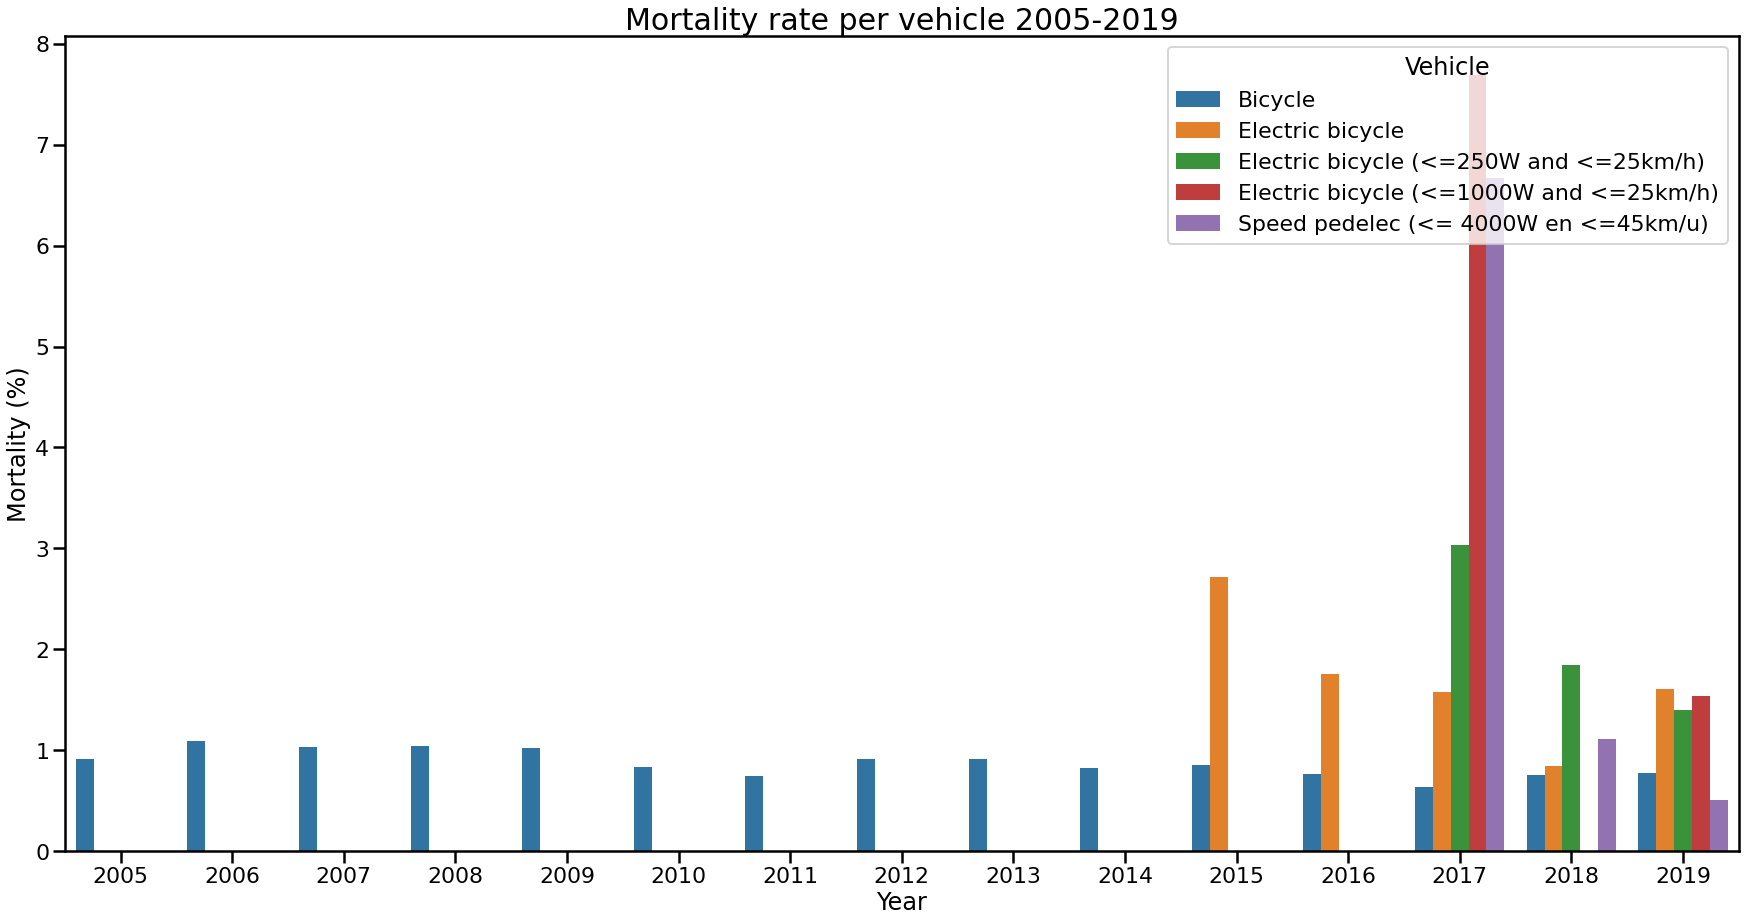

In [20]:
plt.figure(figsize=(30,15))
sns.set_context("poster")
sns.barplot(x="Year", y="Mortality (%)", hue="Vehicle",  data=datayeartype2)
plt.title("Mortality rate per vehicle 2005-2019", size=30)
plt.show()

In [21]:
datayeartype2_10to19 = datayeartype2.drop([0, 1, 2, 3, 4, 5, 6, 7, 8])

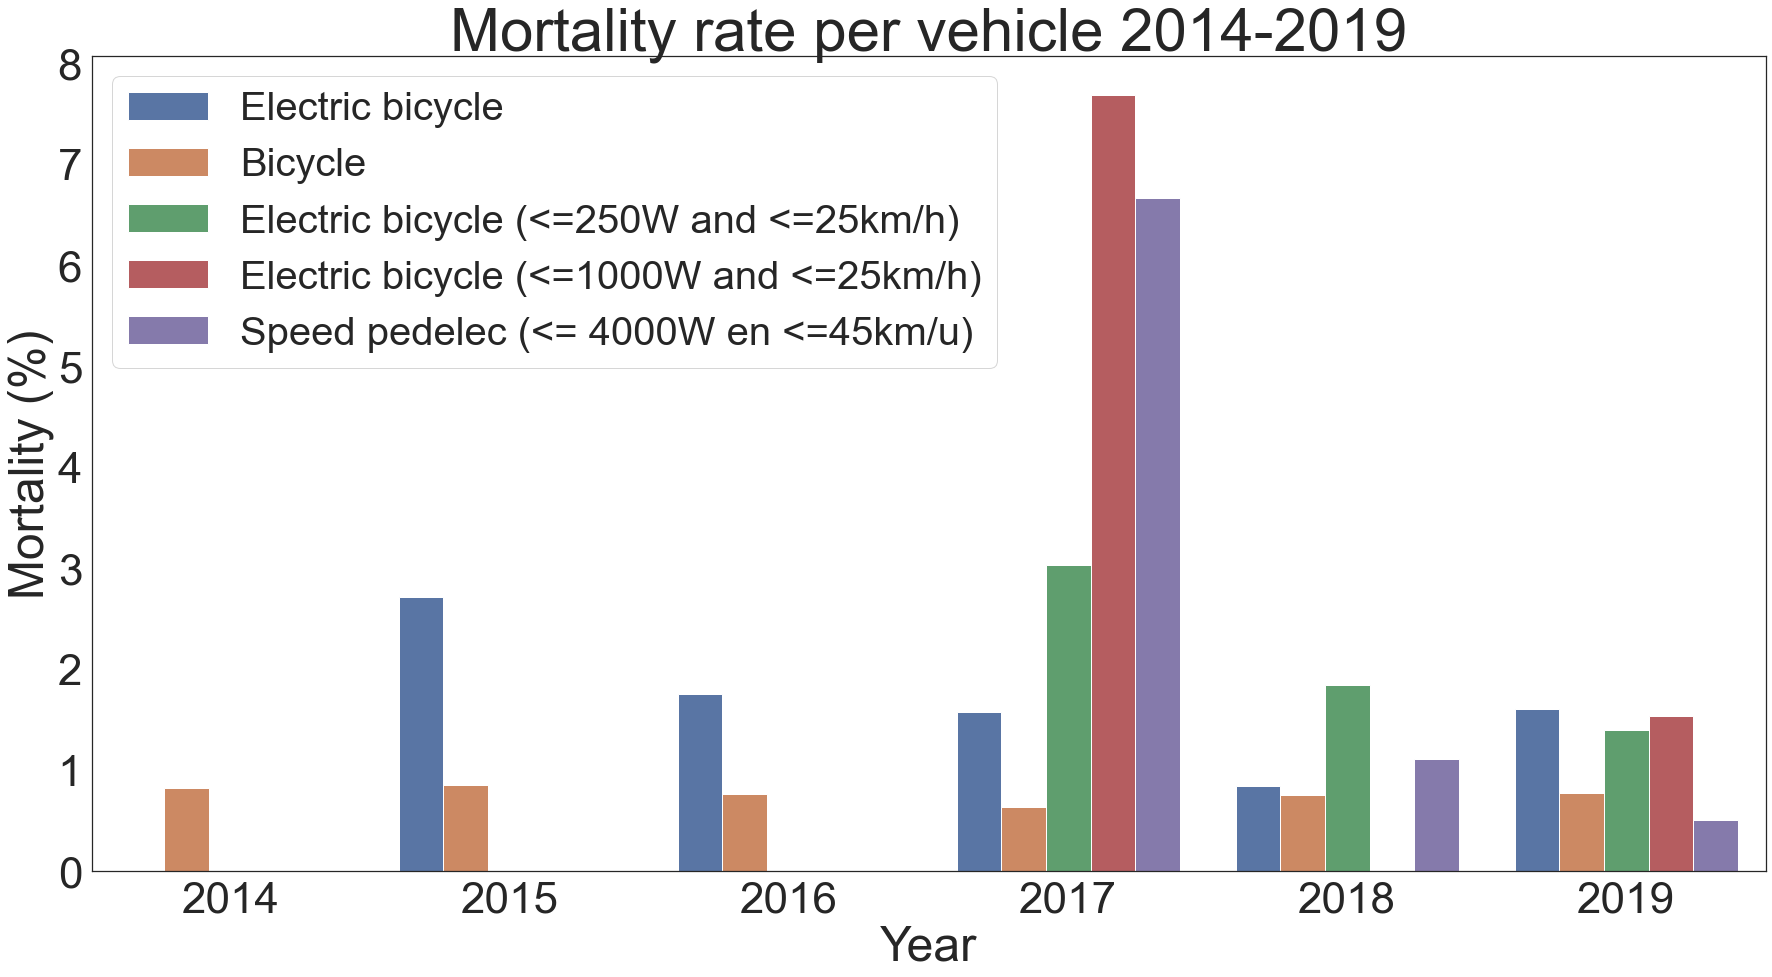

In [22]:
plt.figure(figsize=(30,15))
sns.set_context("poster")
sns.set(font_scale=4, style="white")
sns.barplot(x="Year", y="Mortality (%)", hue="Vehicle",  data=datayeartype2_10to19)
plt.title("Mortality rate per vehicle 2014-2019", size=60)
plt.legend(loc="upper left", fontsize="small")
plt.savefig("Mortality 14-19.png", dpi=400, facecolor="w")
plt.show()

In [23]:
data2intro = data2.groupby(by=[data2["Year"].dt.strftime("%Y"), "Region"]).sum().reset_index()
data2intro

,Year,Region,Number of victims,Slightly injured,Seriously injured,Dead within 30 days
0,2005,Brussels Hoofdstedelijk Gewest,297,284,13,0
1,2005,Vlaams Gewest,7293,6458,768,67
2,2005,Waals Gewest,688,589,90,9
3,2006,Brussels Hoofdstedelijk Gewest,298,287,11,0
4,2006,Vlaams Gewest,7601,6756,762,83
5,2006,Waals Gewest,678,581,86,11
6,2007,Brussels Hoofdstedelijk Gewest,319,305,14,0
7,2007,Vlaams Gewest,7993,7105,805,83
8,2007,Waals Gewest,699,598,91,10
9,2008,Brussels Hoofdstedelijk Gewest,355,344,11,0


In [24]:
data2intro["Region"] = data2intro["Region"].replace("Brussels Hoofdstedelijk Gewest", "Brussels Capital Region")
data2intro["Region"] = data2intro["Region"].replace("Vlaams Gewest", "Flemish Region")
data2intro["Region"] = data2intro["Region"].replace("Waals Gewest", "Walloon Region")
data2intro

,Year,Region,Number of victims,Slightly injured,Seriously injured,Dead within 30 days
0,2005,Brussels Capital Region,297,284,13,0
1,2005,Flemish Region,7293,6458,768,67
2,2005,Walloon Region,688,589,90,9
3,2006,Brussels Capital Region,298,287,11,0
4,2006,Flemish Region,7601,6756,762,83
5,2006,Walloon Region,678,581,86,11
6,2007,Brussels Capital Region,319,305,14,0
7,2007,Flemish Region,7993,7105,805,83
8,2007,Walloon Region,699,598,91,10
9,2008,Brussels Capital Region,355,344,11,0


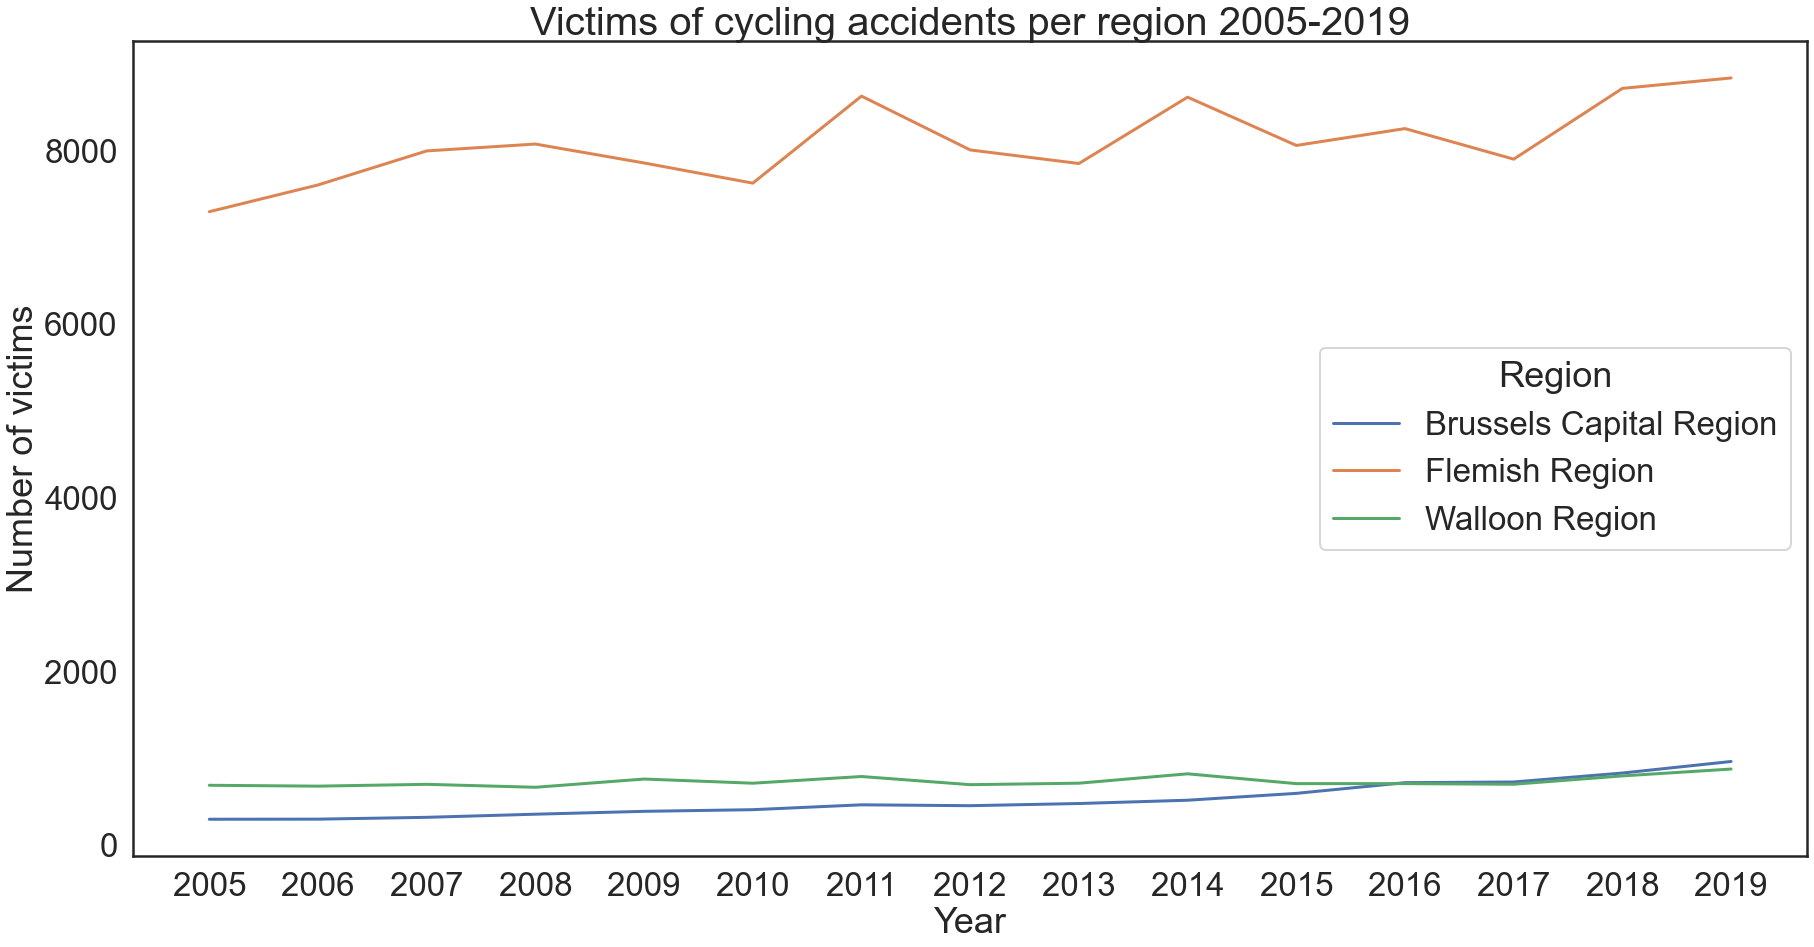

In [25]:
plt.figure(figsize=(30,15))
sns.set(context = "poster", font_scale = 1.5, style = "white")
sns.lineplot(x="Year", y="Number of victims", hue="Region", data=data2intro)
plt.title("Victims of cycling accidents per region 2005-2019", size=40)
plt.show()

In [26]:
data2intro.to_excel("data2intro10to19.xlsx")

In [27]:
data2intro100k = pd.read_excel("data2intro14to19100k.xlsx")

In [28]:
data2intro100k = data2intro100k.round({"Number of victims":0})
data2intro100k

,Unnamed: 0,Year,Region,Number of victims,Slightly injured,Seriously injured,Dead within 30 days
0,27,2014,Brussels Capital Region,44.0,500,15,1
1,28,2014,Flemish Region,134.0,7577,962,73
2,29,2014,Walloon Region,23.0,747,65,8
3,30,2015,Brussels Capital Region,51.0,573,21,1
4,31,2015,Flemish Region,125.0,7152,826,78
5,32,2015,Walloon Region,20.0,631,65,11
6,33,2016,Brussels Capital Region,60.0,691,25,2
7,34,2016,Flemish Region,127.0,7329,856,65
8,35,2016,Walloon Region,20.0,632,61,14
9,36,2017,Brussels Capital Region,61.0,700,26,0


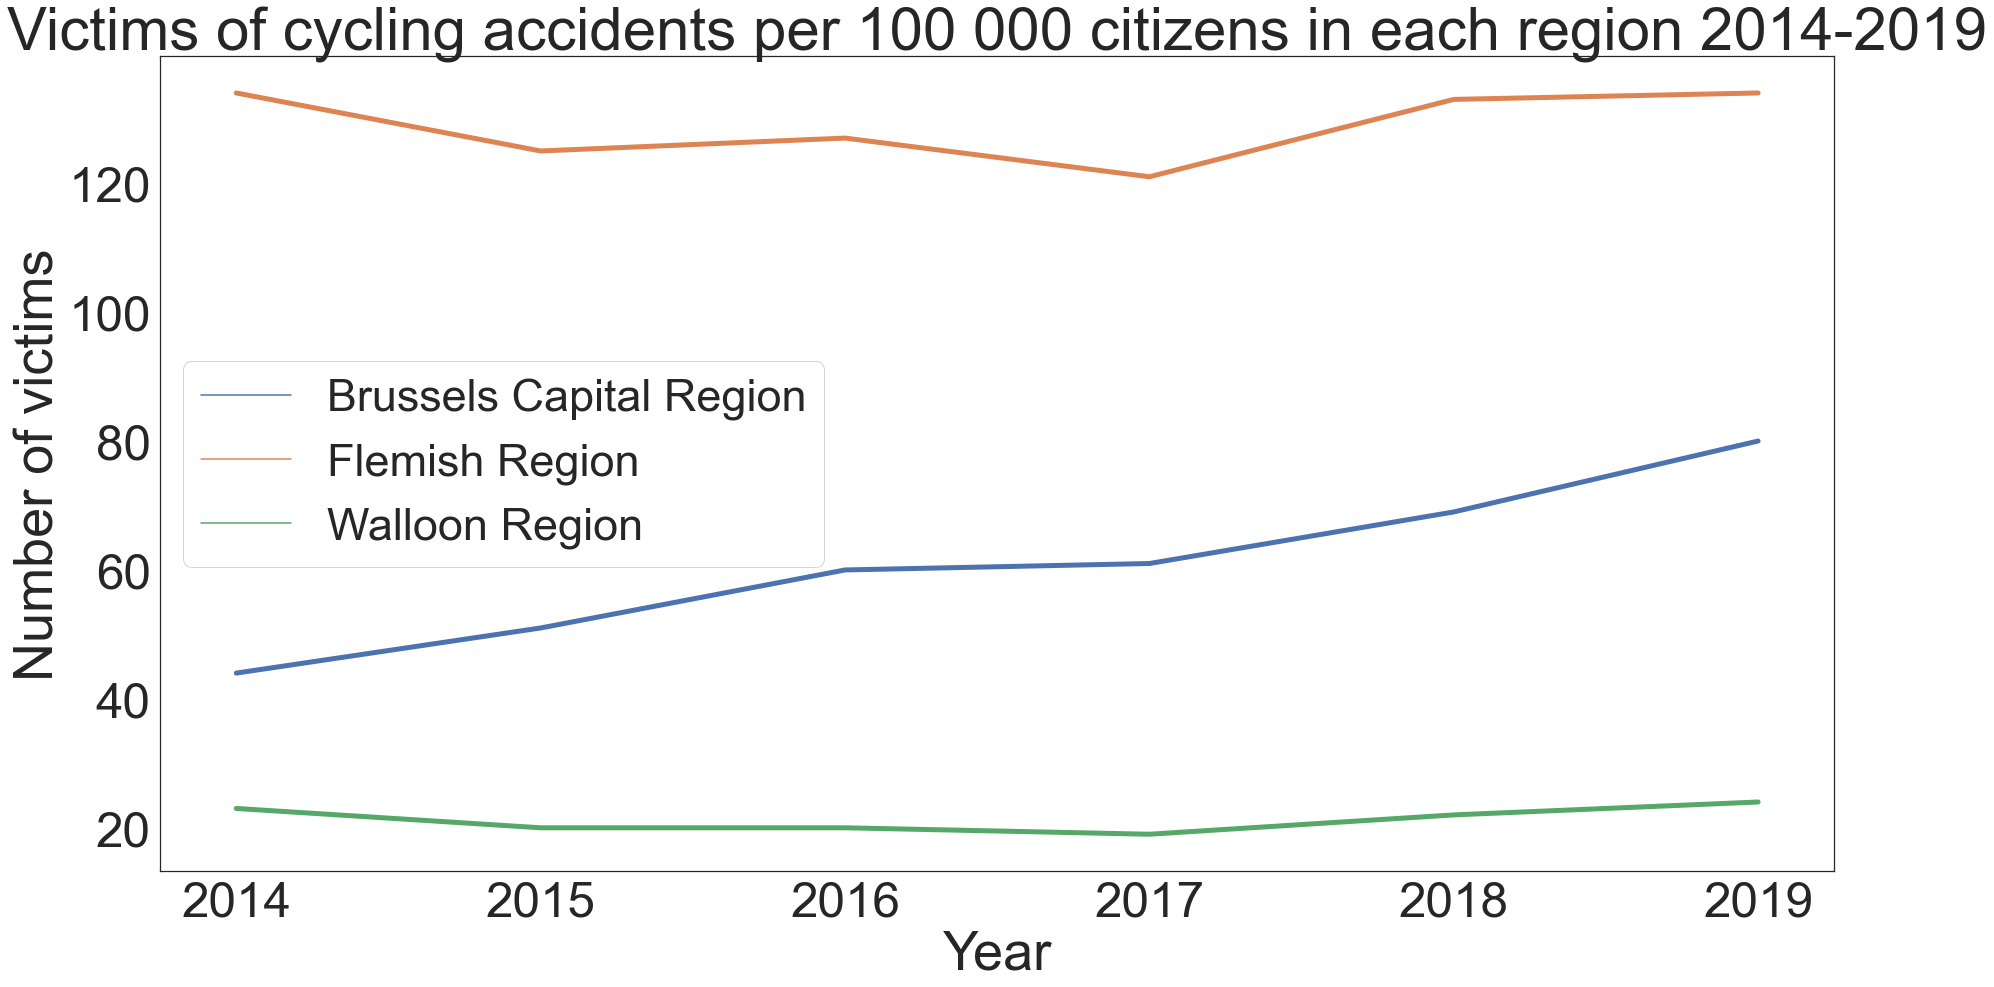

In [29]:
plt.figure(figsize=(30,15))
sns.set_context("poster")
sns.set(font_scale=4.5, style="white")
sns.lineplot(x="Year", y="Number of victims", hue="Region", data=data2intro100k, linewidth = 5)
plt.title("Victims of cycling accidents per 100 000 citizens in each region 2014-2019", size=60)
plt.legend(fontsize="small")
plt.savefig("Victims per 100k 14-19.png", dpi=400, facecolor="w")
plt.show()

In [30]:
data3 = data2.loc[data["Vehicle"].isin(["Elektrische fiets",
                                       "Fiets met elektrische hulpmotor (<=250W en <=25km/u)",
                                      "Speed pedelec (<= 4000W en <=45km/u)",
                                      "Gemotoriseerde fiets (<=1000W en <=25km/u)"])]
data3

,Year,Day of week,Number of victims,Slightly injured,Seriously injured,Dead within 30 days,Victim type,Vehicle,Road type,Age,Province,Region
546053,2014-11-10,maandag,1,1,0,0,Fietser,Elektrische fiets,Gewestweg,50 tot 54 jaar,Provincie Antwerpen,Vlaams Gewest
546274,2014-10-17,vrijdag,1,1,0,0,Fietser,Elektrische fiets,Gemeenteweg,65 tot 69 jaar,Provincie Antwerpen,Vlaams Gewest
546538,2014-12-15,maandag,1,1,0,0,Fietser,Elektrische fiets,Gewestweg,50 tot 54 jaar,Provincie Antwerpen,Vlaams Gewest
547344,2014-11-22,zaterdag,1,1,0,0,Fietser,Elektrische fiets,Gewestweg,75 jaar en meer,Provincie Antwerpen,Vlaams Gewest
547785,2014-12-15,maandag,1,1,0,0,Fietser,Elektrische fiets,Gemeenteweg,35 tot 39 jaar,Provincie Antwerpen,Vlaams Gewest
...,...,...,...,...,...,...,...,...,...,...,...,...
842696,2019-06-05,woensdag,1,1,0,0,Bestuurder,Gemotoriseerde fiets (<=1000W en <=25km/u),Gewestweg,45 tot 49 jaar,Provincie Namen,Waals Gewest
842815,2019-10-03,donderdag,1,1,0,0,Fietser,Gemotoriseerde fiets (<=1000W en <=25km/u),Gewestweg,35 tot 39 jaar,Provincie Namen,Waals Gewest
842823,2019-10-24,donderdag,1,1,0,0,Fietser,Fiets met elektrische hulpmotor (<=250W en <=2...,Gemeenteweg,45 tot 49 jaar,Provincie Namen,Waals Gewest
842844,2019-11-25,maandag,1,1,0,0,Fietser,Fiets met elektrische hulpmotor (<=250W en <=2...,Gewestweg,40 tot 44 jaar,Provincie Namen,Waals Gewest


In [31]:
dataage = data3.groupby(by=[data2["Year"].dt.strftime("%Y"), "Age"]).sum()
dataage

Number of victims  Slightly injured  Seriously injured  \
Year Age                                                                       
2014 10 tot 14 jaar                   2                 2                  0   
     30 tot 34 jaar                   1                 1                  0   
     35 tot 39 jaar                   1                 1                  0   
     40 tot 44 jaar                   3                 3                  0   
     45 tot 49 jaar                   4                 4                  0   
...                                 ...               ...                ...   
2019 60 tot 64 jaar                 185               150                 31   
     65 tot 69 jaar                 138               107                 27   
     70 tot 74 jaar                 103                84                 19   
     75 jaar en meer                213               156                 45   
     Onbekend                         2                 2                  0   

                      Dead within 30 days  
Year Age                                   
2014 10 tot 14 jaar                     0  
     30 tot 34 jaar                     0  
     35 tot 39 jaar                     0  
     40 tot 44 jaar                     0  
     45 tot 49 jaar                     0  
...                                   ...  
2019 60 tot 64 jaar                     4  
     65 tot 69 jaar                     4  
     70 tot 74 jaar                     0  
     75 jaar en meer                   12  
     Onbekend                           0  

[90 rows x 4 columns]

In [32]:
dataage2 = data3.groupby(by=["Age", data2["Year"].dt.strftime("%Y")]).sum().reset_index()
dataage2

,Age,Year,Number of victims,Slightly injured,Seriously injured,Dead within 30 days
0,0 tot 4 jaar,2016,1,1,0,0
1,0 tot 4 jaar,2017,3,3,0,0
2,0 tot 4 jaar,2018,8,8,0,0
3,0 tot 4 jaar,2019,10,10,0,0
4,10 tot 14 jaar,2014,2,2,0,0
...,...,...,...,...,...,...
85,75 jaar en meer,2018,169,130,30,9
86,75 jaar en meer,2019,213,156,45,12
87,Onbekend,2016,1,1,0,0
88,Onbekend,2018,3,3,0,0


In [33]:
dataage2 = dataage2.drop([87, 88, 89])
dataage2

,Age,Year,Number of victims,Slightly injured,Seriously injured,Dead within 30 days
0,0 tot 4 jaar,2016,1,1,0,0
1,0 tot 4 jaar,2017,3,3,0,0
2,0 tot 4 jaar,2018,8,8,0,0
3,0 tot 4 jaar,2019,10,10,0,0
4,10 tot 14 jaar,2014,2,2,0,0
...,...,...,...,...,...,...
82,75 jaar en meer,2015,99,65,26,8
83,75 jaar en meer,2016,117,78,34,5
84,75 jaar en meer,2017,140,113,19,8
85,75 jaar en meer,2018,169,130,30,9


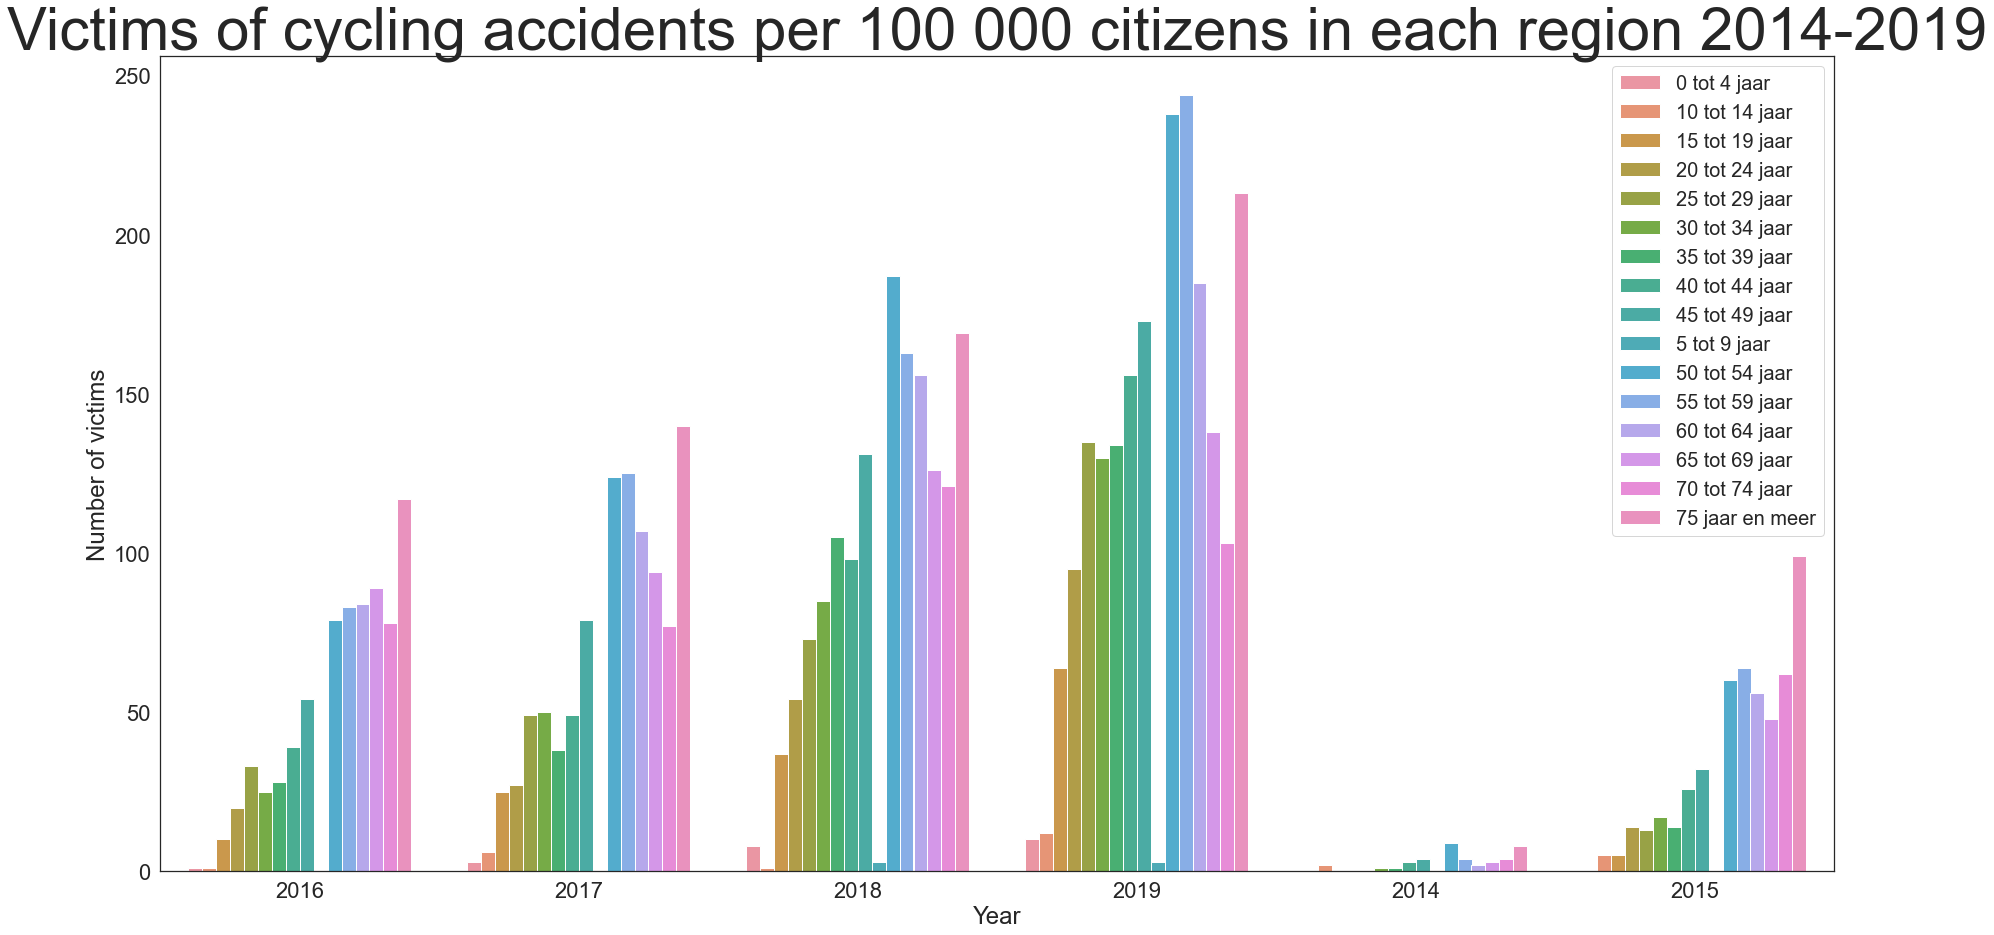

In [34]:
plt.figure(figsize=(30,15))
sns.set_context("poster")
sns.set(font_scale=2, style="white")
sns.barplot(x="Year", y="Number of victims", hue="Age", data=dataage2)
plt.title("Victims of cycling accidents per 100 000 citizens in each region 2014-2019", size=60)
plt.legend(fontsize="small")
plt.show()

In [35]:
dataage3 = data3.groupby(by=[data2["Year"].dt.strftime("%Y"), "Age"]).sum().reset_index()

In [36]:
dataage3 = dataage3.loc[data["Age"].isin(["10 tot 14 jaar",
                                         "15 tot 19 jaar",
                                         "20 tot 24 jaar",
                                         "25 tot 29 jaar",
                                         "30 tot 34 jaar",
                                         "35 tot 39 jaar",
                                         "40 tot 44 jaar",
                                          "45 tot 49 jaar",
                                         "50 tot 54 jaar",
                                         "55 tot 59 jaar",
                                         "60 tot 64 jaar",
                                         "65 tot 69 jaar",
                                         "70 tot 74 jaar",
                                         "75 jaar en meer"])]
dataage3

,Year,Age,Number of victims,Slightly injured,Seriously injured,Dead within 30 days
0,2014,10 tot 14 jaar,2,2,0,0
1,2014,30 tot 34 jaar,1,1,0,0
2,2014,35 tot 39 jaar,1,1,0,0
3,2014,40 tot 44 jaar,3,3,0,0
4,2014,45 tot 49 jaar,4,4,0,0
...,...,...,...,...,...,...
85,2019,60 tot 64 jaar,185,150,31,4
86,2019,65 tot 69 jaar,138,107,27,4
87,2019,70 tot 74 jaar,103,84,19,0
88,2019,75 jaar en meer,213,156,45,12


In [37]:
dataage3 = dataage3.drop([89])
dataage3

,Year,Age,Number of victims,Slightly injured,Seriously injured,Dead within 30 days
0,2014,10 tot 14 jaar,2,2,0,0
1,2014,30 tot 34 jaar,1,1,0,0
2,2014,35 tot 39 jaar,1,1,0,0
3,2014,40 tot 44 jaar,3,3,0,0
4,2014,45 tot 49 jaar,4,4,0,0
...,...,...,...,...,...,...
84,2019,55 tot 59 jaar,244,205,33,6
85,2019,60 tot 64 jaar,185,150,31,4
86,2019,65 tot 69 jaar,138,107,27,4
87,2019,70 tot 74 jaar,103,84,19,0


In [38]:
pd.set_option('display.max_rows', None)
dataage3

,Year,Age,Number of victims,Slightly injured,Seriously injured,Dead within 30 days
0,2014,10 tot 14 jaar,2,2,0,0
1,2014,30 tot 34 jaar,1,1,0,0
2,2014,35 tot 39 jaar,1,1,0,0
3,2014,40 tot 44 jaar,3,3,0,0
4,2014,45 tot 49 jaar,4,4,0,0
5,2014,50 tot 54 jaar,9,7,2,0
6,2014,55 tot 59 jaar,4,3,1,0
7,2014,60 tot 64 jaar,2,2,0,0
8,2014,65 tot 69 jaar,3,3,0,0
9,2014,70 tot 74 jaar,4,4,0,0


In [39]:
dataage3 = dataage3.drop([25,40,41,56,65,72,73,82])
dataage3

,Year,Age,Number of victims,Slightly injured,Seriously injured,Dead within 30 days
0,2014,10 tot 14 jaar,2,2,0,0
1,2014,30 tot 34 jaar,1,1,0,0
2,2014,35 tot 39 jaar,1,1,0,0
3,2014,40 tot 44 jaar,3,3,0,0
4,2014,45 tot 49 jaar,4,4,0,0
5,2014,50 tot 54 jaar,9,7,2,0
6,2014,55 tot 59 jaar,4,3,1,0
7,2014,60 tot 64 jaar,2,2,0,0
8,2014,65 tot 69 jaar,3,3,0,0
9,2014,70 tot 74 jaar,4,4,0,0


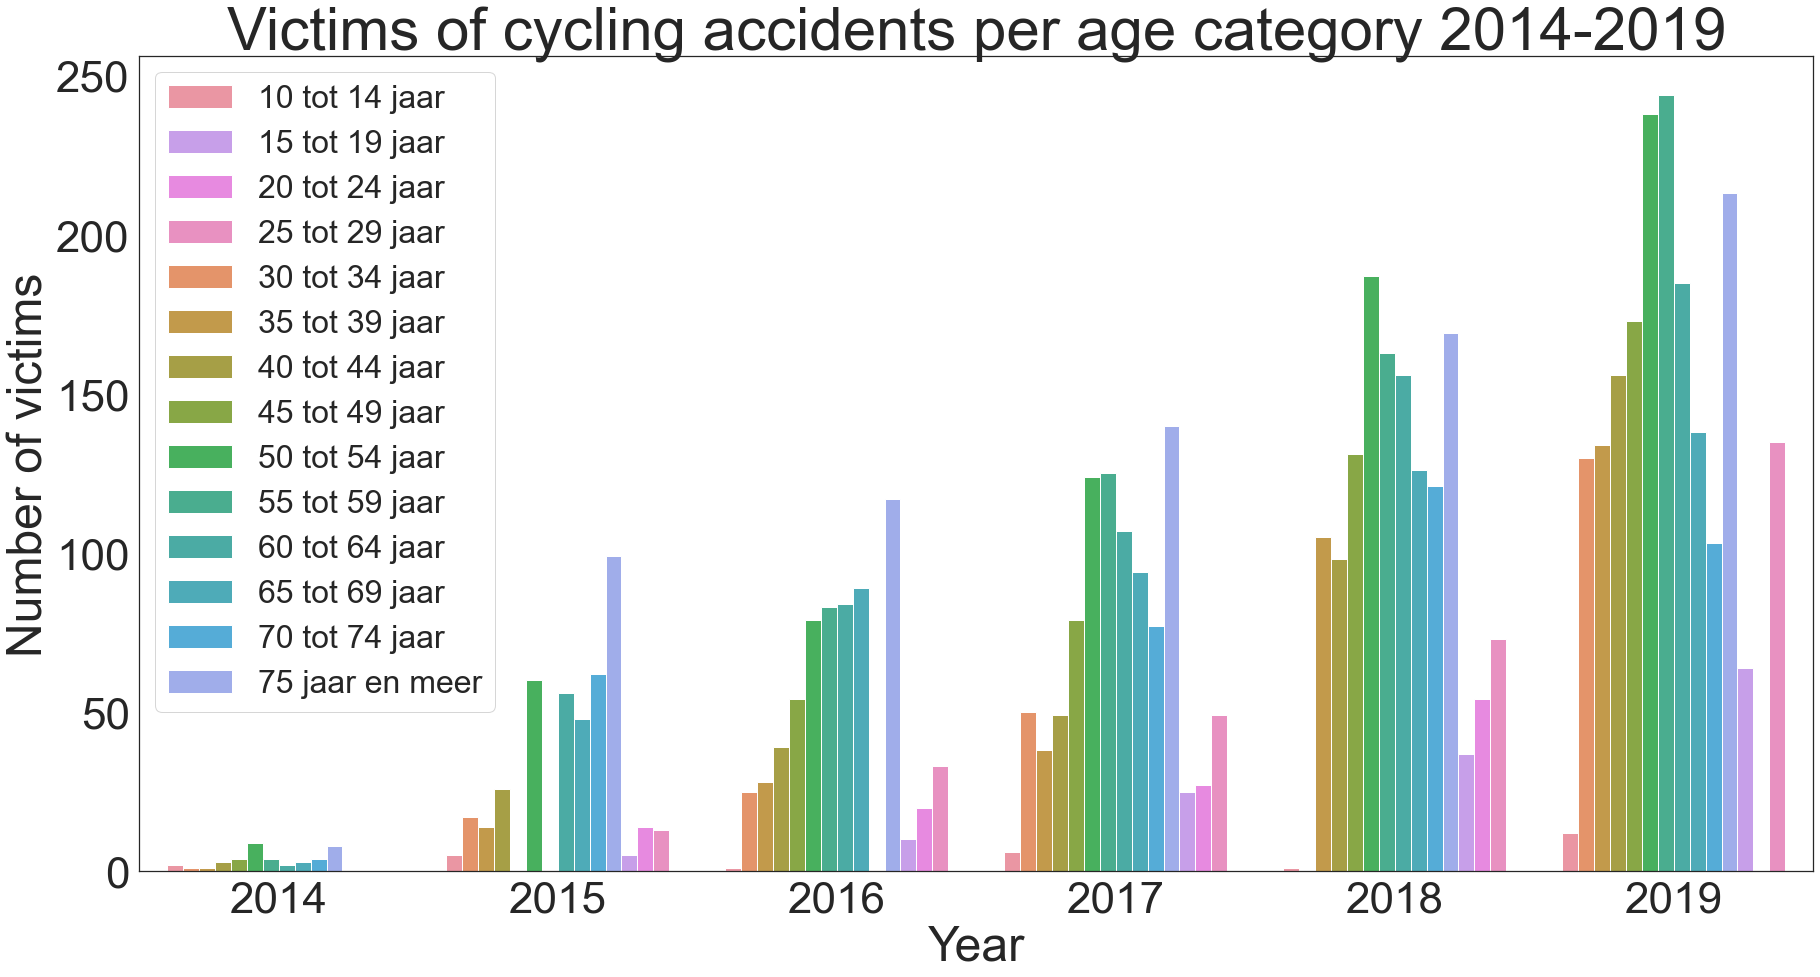

In [68]:
plt.figure(figsize=(30,15))
sns.set_context("poster")
sns.set(font_scale=4, style="white")
sns.barplot(x="Year", y="Number of victims", hue="Age", data=dataage3)
plt.title("Victims of cycling accidents per age category 2014-2019", size=60)
handles, labels = plt.gca().get_legend_handles_labels()
order = [0,11,12,13,1,2,3,4,5,6,7,8,9,10]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],
           loc="upper left",
           fontsize=32)
plt.savefig("Victims per age")
plt.show()